# CUSTOMER RETENTION PROJECT

<b>ATRIBUTES OF THE DATASET</b>

- Historical customer data (H_C_D): Customer data such as usage, sign up date, forecasted usage etc 
- Historical pricing data(H_P_D): variable and fixed pricing data etc 
- Churn indicator (CH_I): whether each customer has churned or not 

<b>List of the columns (40)</b>
    
- "id" contact id

- "activity_new" category of the company's activity

- "campaigndiscele" code of the electricity campaign the customer last subscribed to

- "channel_sales" code of the sales channel

- "cons_12m" electricity consumption of the past 12 months

- "consgas12m" gas consumption of the past 12 months

- "conslastmonth" electricity consumption of the last month


- "date_activ" date of activation of the contract

- "date_end" registered date of the end of the contract

- "datefirstactiv" date of the first contract of the client

- "datemodifprod" date of last modification of the product

- "date_renewal" date of the next contract renewal


- "forecastbasebill_ele" forecasted electricity bill baseline for next month

- "forecastbasebill_year" forecasted electricity bill baseline for calendar year

- "forecastbill12m" forecasted electricity bill baseline for 12 months

- "forecast_cons" forecasted electricity consumption for next month

- "forecastcons12m" forecasted electricity consumption for next 12 months

- "forecastconsyear" forecasted electricity consumption for next calendar year

- "forecastdiscountenergy" forecasted value of currecurrent discount

- "forecastmeterrent_12m" forecasted bill of meter rental for the next 12 months

- "forecastpriceenergy_p1" forecasted energy price for 1st period

- "forecastpriceenergy_p2" forecasted energy price for 2nd period

- "forecastpricepow_p1" forecasted power price for 1st period


- "has_gas indicated" if clieclient is also a gas client

- "imp_cons" current paid consumption

- "margingrosspow_ele" gross margin on power subscription

- "marginnetpow_ele" net margin on power subscription

- "nbprodact" number of active products and services

- "net_margin" total net margin

- "numyearsantig" antiquity of the client (in number of years)

- "origin_up" code of the electricity campaign the customer first subscribed to

- "pow_max" subscribed power

- "price_date' reference date

- "pricep1var" price of energy for the 1st period

- "pricep2var" price of energy for the 2nd period

- "pricep3var" price of energy for the 3rd period

- "pricep1fix" price of power for the 1st period

- "pricep2fix" price of power for the 2nd period

- "pricep3fix" price of power for the 3rd period

- "churn" has the client churned over the next 3 months

# Importing libraries

In [93]:
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTE

import datetime
import seaborn as sns
import xgboost as xgb

import matplotlib.patches as mpatches
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_rows', 200)

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, mean_absolute_error, mean_squared_error, r2_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import zscore as zscore

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

<Figure size 1600x800 with 0 Axes>

# E.D.A.
We start the exploratory data analysis by loading the dataset using pandas, checking missing values, doing feature engineering, checking outliers and comparing between univariate and bivariate features

## Loading the data in to dataframes

### Historical customer data (H_C_D): Customer data such as usage, sign up date, forecasted usage etc 

In [2]:
#train_data
H_C_D=pd.read_csv('ml_case_training_data.csv')
H_C_D

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,NaN,2015-05-08,2014-05-26,NaN,NaN,NaN,NaN,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
16092,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2012-08-27,2015-08-28,68.64,68.64,1254.65,15.94,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaN,2012-02-08,2015-02-09,NaN,NaN,NaN,NaN,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,NaN,2012-08-30,2015-08-31,NaN,NaN,NaN,NaN,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000


In [3]:
H_C_D.shape

(16096, 32)

In [4]:
H_C_D.dtypes

id                           object
activity_new                 object
campaign_disc_ele           float64
channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_first_activ             object
date_modif_prod              object
date_renewal                 object
forecast_base_bill_ele      float64
forecast_base_bill_year     float64
forecast_bill_12m           float64
forecast_cons               float64
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                 

In [5]:
summary = H_C_D.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
campaign_disc_ele,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cons_12m,16096.0,194804.384630,679515.083441,-125276.000000,5906.250000,15332.500000,50221.500000,1.609711e+07
cons_gas_12m,16096.0,31911.636742,177588.456233,-3037.000000,0.000000,0.000000,0.000000,4.188440e+06
cons_last_month,16096.0,19461.536158,82356.756560,-91386.000000,0.000000,901.000000,4127.000000,4.538720e+06
forecast_base_bill_ele,3508.0,335.843857,649.406000,-364.940000,0.000000,162.955000,396.185000,1.256608e+04
forecast_base_bill_year,3508.0,335.843857,649.406000,-364.940000,0.000000,162.955000,396.185000,1.256608e+04
forecast_bill_12m,3508.0,3837.441866,5425.744327,-2503.480000,1158.175000,2187.230000,4246.555000,8.112263e+04
forecast_cons,3508.0,206.845165,455.634288,0.000000,0.000000,42.215000,228.117500,9.682890e+03
forecast_cons_12m,16096.0,2370.555949,4035.085664,-16689.260000,513.230000,1179.160000,2692.077500,1.038019e+05
forecast_cons_year,16096.0,1907.347229,5257.364759,-85627.000000,0.000000,378.000000,1994.250000,1.753750e+05


### Historical pricing data (H_P_D): variable and fixed pricing data etc 

In [6]:
#train_hist
H_P_D=pd.read_csv('ml_case_training_hist_data.csv')
H_P_D

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [7]:
len(H_P_D["id"].unique())

16096

In [8]:
H_P_D.shape

(193002, 8)

In [9]:
H_P_D.dtypes

id               object
price_date       object
price_p1_var    float64
price_p2_var    float64
price_p3_var    float64
price_p1_fix    float64
price_p2_fix    float64
price_p3_fix    float64
dtype: object

In [10]:
summary = H_P_D.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
price_p1_var,191643.0,0.140991,0.025117,0.000000,0.125976,0.146033,0.151635,0.280700
price_p2_var,191643.0,0.054412,0.050033,0.000000,0.000000,0.085483,0.101780,0.229788
price_p3_var,191643.0,0.030712,0.036335,0.000000,0.000000,0.000000,0.072558,0.114102
price_p1_fix,191643.0,43.325546,5.437952,-0.177779,40.728885,44.266930,44.444710,59.444710
price_p2_fix,191643.0,10.698201,12.856046,-0.097752,0.000000,0.000000,24.339581,36.490692
price_p3_fix,191643.0,6.455436,7.782279,-0.065172,0.000000,0.000000,16.226389,17.458221


### Churn indicator (CH_I): whether each customer has churned or not

In [11]:
#train_out
CH_I=pd.read_csv('ml_case_training_output.csv')
CH_I

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0
...,...,...
16091,18463073fb097fc0ac5d3e040f356987,0
16092,d0a6f71671571ed83b2645d23af6de00,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,0


In [12]:
CH_I.shape

(16096, 2)

In [13]:
CH_I.dtypes

id       object
churn     int64
dtype: object

In [14]:
summary = CH_I.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
churn,16096.0,0.099093,0.298796,0.0,0.0,0.0,0.0,1.0


### Concatinating all the datasets (alldf)

In [15]:
alldf = pd.concat([H_C_D,H_P_D,CH_I],axis=1,sort=False, join="inner").reset_index()


In [16]:
alldf

,index,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,id,churn
0,0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,48ada52261e7cf58715202705a0451c9,0
1,1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,24011ae4ebbe3035111d65fa7c15bc57,1
2,2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,d29c2c54acc38ff3c0614d0a653813dd,0
3,3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000,764c75f661154dac3a6c254cd082ea7d,0
4,4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000,bba03439a292a1e166f80264c16191cb,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,16091,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,NaN,2015-05-08,2014-05-26,NaN,NaN,NaN,NaN,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,12021e13ce8fd6eeb7874758e597a138,2015-09-01,0.156876,0.131738,0.093827,41.063969,24.837586,16.724391,18463073fb097fc0ac5d3e040f356987,0
16092,16092,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2012-08-27,2015-08-28,68.64,68.64,1254.65,15.94,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,12021e13ce8fd6eeb7874758e597a138,2015-10-01,0.156876,0.131738,0.093827,41.063969,24.837586,16.724391,d0a6f71671571ed83b2645d23af6de00,1
16093,16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaN,2012-02-08,2015-02-09,NaN,NaN,NaN,NaN,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,12021e13ce8fd6eeb7874758e597a138,2015-11-01,0.156876,0.131738,0.09382

## Overview of datasets

In [17]:
H_C_D.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [18]:
H_P_D.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [19]:
CH_I.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


## Cleaning data

Creating a function to look at the unique values of each columns by dataframe

In [20]:
def print_unique_col_values(dataframe):
    for column in dataframe:
        if dataframe[column].dtypes=='object':
            print (f'{column}: {dataframe[column].unique()}')

In [21]:
print_unique_col_values(H_C_D)

id: ['48ada52261e7cf58715202705a0451c9' '24011ae4ebbe3035111d65fa7c15bc57'
 'd29c2c54acc38ff3c0614d0a653813dd' ... '10e6828ddd62cbcf687cb74928c4c2d2'
 '1cf20fd6206d7678d5bcafd28c53b4db' '563dde550fd624d7352f3de77c0cdfcd']
activity_new: ['esoiiifxdlbkcsluxmfuacbdckommixw' nan 'sfisfxfcocfpcmckuekokxuseixdaoeu'
 'sscfoipxikopfskekuobeuxkxmwsuucb' 'cssldxpacdmuuaulamxdekcokibauube'
 'ppcxfxbffsxaakxamcdpexdoxulfwwae' 'kkklcdamwfafdcfwofuscwfwadblfmce'
 'apdekpcbwosbxepsfxclislboipuxpop' 'xwkaesbkfsacseixxksofpddwfkbobki'
 'lckfspcixfmlwudlisbaiacuioicciam' 'daobdssbkieoukwxbopxiiospudkopwl'
 'cccpsslxcemdlomsaffxsecccbxpdkax' 'kwuslieomapmswolewpobpplkaooaaew'
 'ifppdlcfssupdcsdcclkoubulccouwml' 'mwmuuaeloxbawummwfwcmxckmsfibpwk'
 'almlfkoedpwfdmmsebsdwueskducuiok' 'wlxfbefauebfbauopppswxppaafdkoap'
 'cwkwaxadbfukekuspislmbipbkxdudla' 'cluecxlameloamldmasudocsbmaoamdw'
 'pmccdfmdxpmdeodsasdeboedildifmlp' 'paoauaefwcbedmiowwmokakuisslckbd'
 'bapcuxcousodpaabofsesslupodaapcx' 'dupxuibdflmsk

In [22]:
print_unique_col_values(H_P_D)

id: ['038af19179925da21a25619c5a24b745' '31f2ce549924679a3cbb2d128ae9ea43'
 '36b6352b4656216bfdb96f01e9a94b4e' ... 'd00da2c0c568614b9937791f681cd7d7'
 '045f94f0b7f538a8d8fae11080abb5da' '16f51cdc2baa19af0b940ee1b3dd17d5']
price_date: ['2015-01-01' '2015-02-01' '2015-03-01' '2015-04-01' '2015-05-01'
 '2015-06-01' '2015-07-01' '2015-08-01' '2015-09-01' '2015-10-01'
 '2015-11-01' '2015-12-01']


In [23]:
print_unique_col_values(CH_I)

id: ['48ada52261e7cf58715202705a0451c9' '24011ae4ebbe3035111d65fa7c15bc57'
 'd29c2c54acc38ff3c0614d0a653813dd' ... '10e6828ddd62cbcf687cb74928c4c2d2'
 '1cf20fd6206d7678d5bcafd28c53b4db' '563dde550fd624d7352f3de77c0cdfcd']


### Finding missing values

<b>Check H_C_D Dataset<b>

In [24]:
H_C_D.isnull().sum().sum()

93633

In [25]:
# H_C_D HAVE 93633 MISSING VALUES OF 16096 INSTANCES, WE WILL FIND OUT WHICH COLUMNS ARE MISSING THE MOST

def missing_data(df):
    total = df.isnull().sum()
    percent = (df.isnull().sum()/H_C_D.isnull().count()*100)
    missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in df.columns:
        dtype = str(df[col].dtype)
        types.append(dtype)
    missing_values['Types'] = types
    missing_values.sort_values('Total',ascending=False,inplace=True)
    return(np.transpose(missing_values))
missing_data(H_C_D)

,campaign_disc_ele,forecast_bill_12m,date_first_activ,forecast_cons,forecast_base_bill_ele,forecast_base_bill_year,activity_new,channel_sales,date_modif_prod,forecast_price_pow_p1,forecast_price_energy_p2,forecast_price_energy_p1,forecast_discount_energy,origin_up,date_renewal,net_margin,margin_net_pow_ele,margin_gross_pow_ele,pow_max,date_end,imp_cons,nb_prod_act,num_years_antig,id,has_gas,forecast_meter_rent_12m,forecast_cons_year,date_activ,cons_last_month,cons_gas_12m,cons_12m,forecast_cons_12m
Total,16096,12588,12588,12588,12588,12588,9545,4218,157,126,126,126,126,87,40,15,13,13,3,2,0,0,0,0,0,0,0,0,0,0,0,0
Percent,100.0,78.205765,78.205765,78.205765,78.205765,78.205765,59.300447,26.205268,0.975398,0.782803,0.782803,0.782803,0.782803,0.540507,0.248509,0.093191,0.080765,0.080765,0.018638,0.012425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,float64,float64,object,float64,float64,float64,object,object,object,float64,float64,float64,float64,object,object,float64,float64,float64,float64,object,float64,int64,int64,object,object,float64,int64,object,int64,int64,int64,float64


In [26]:
H_C_D_df =H_C_D.copy()

<AxesSubplot:title={'center':'Percent missing data by feature'}, xlabel='Features', ylabel='Percent of missing values'>

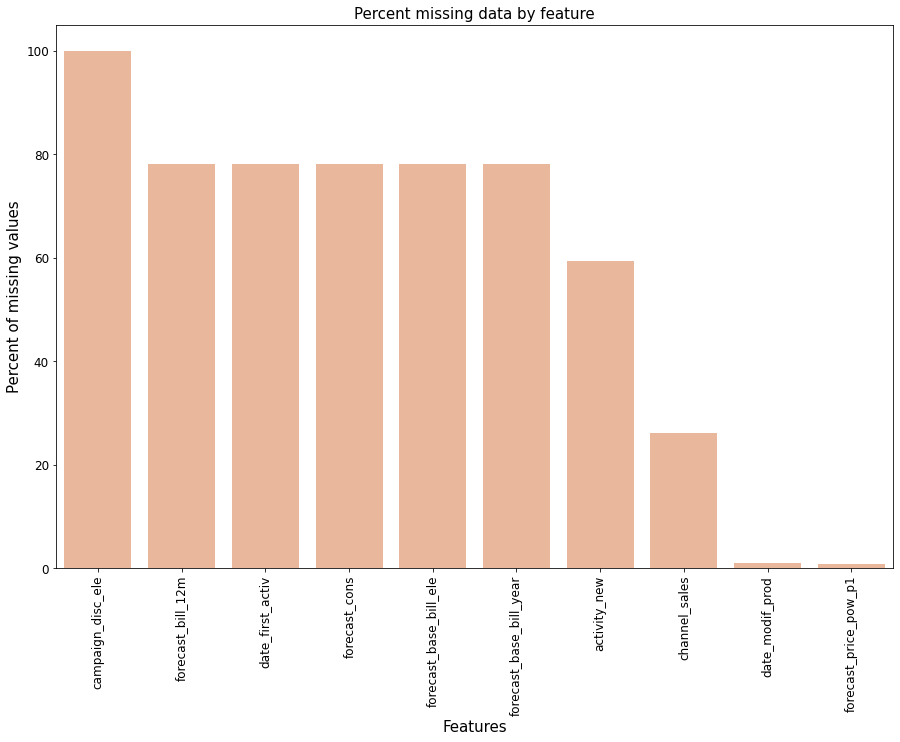

In [27]:
missing_values_count = (H_C_D_df.isnull().sum()/H_C_D.isnull().count()*100).sort_values(ascending=False)
plt.figure(figsize=(15,10))
base_color = sns.color_palette("rocket_r")[0]
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.xticks(rotation=90)
sns.barplot(missing_values_count[:10].index.values, missing_values_count[:10], color = base_color)

6 features have more than 70% of missing values

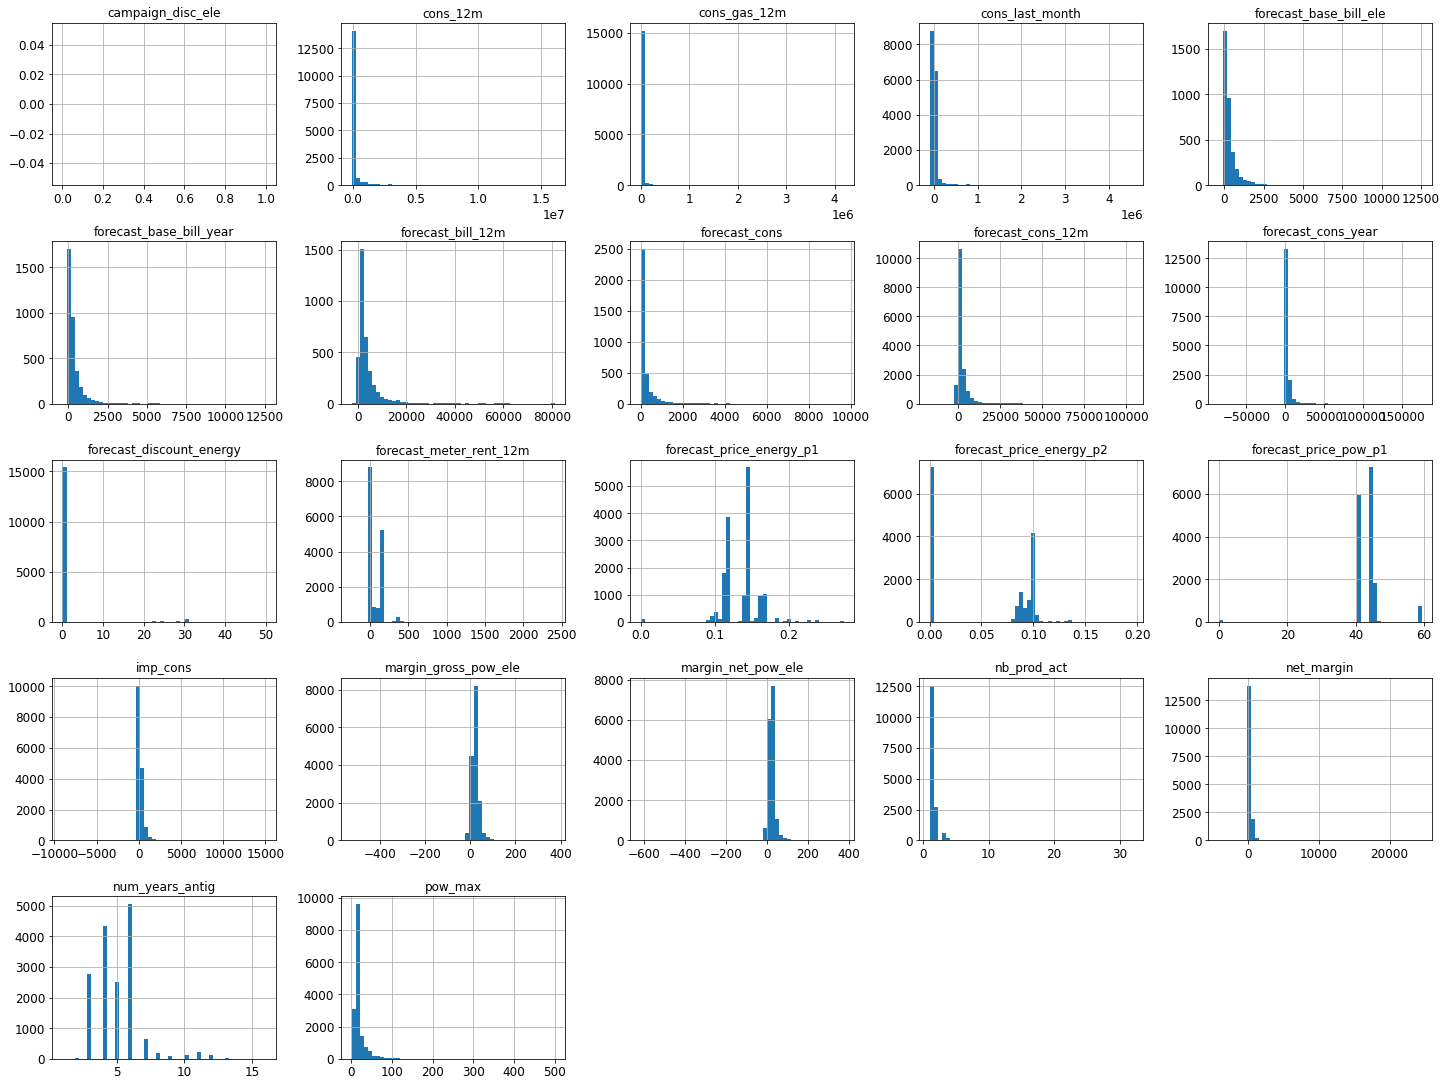

In [28]:
H_C_D_df.hist(bins=50, figsize=(20,15))
plt.tight_layout(pad=0.4)
plt.show()

In [29]:
H_C_D_df.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


8 rows × 22 columns. 
Most of the features are skewed, years of antiquity are 5 followed by net margin aprox. $217

<b>Check H_P_D Dataset<b>

In [30]:
H_P_D_df = H_P_D.copy()
statistics_data =(pd.DataFrame(H_P_D_df.describe())).T
statistics_data

,count,mean,std,min,25%,50%,75%,max
price_p1_var,191643.0,0.140991,0.025117,0.000000,0.125976,0.146033,0.151635,0.280700
price_p2_var,191643.0,0.054412,0.050033,0.000000,0.000000,0.085483,0.101780,0.229788
price_p3_var,191643.0,0.030712,0.036335,0.000000,0.000000,0.000000,0.072558,0.114102
price_p1_fix,191643.0,43.325546,5.437952,-0.177779,40.728885,44.266930,44.444710,59.444710
price_p2_fix,191643.0,10.698201,12.856046,-0.097752,0.000000,0.000000,24.339581,36.490692
price_p3_fix,191643.0,6.455436,7.782279,-0.065172,0.000000,0.000000,16.226389,17.458221



average price of energy for the 1st period is $0.14

average price of energy for the 2st period is $0.05

average price of energy for the 3st period is $0.03

average price of power for the 1st period is $43.32

average price of power for the 2st period is $10.69

average price of power for the 3st period is $6.45



<AxesSubplot:title={'center':'Percent missing data by feature'}, xlabel='Features', ylabel='Percent of missing values'>

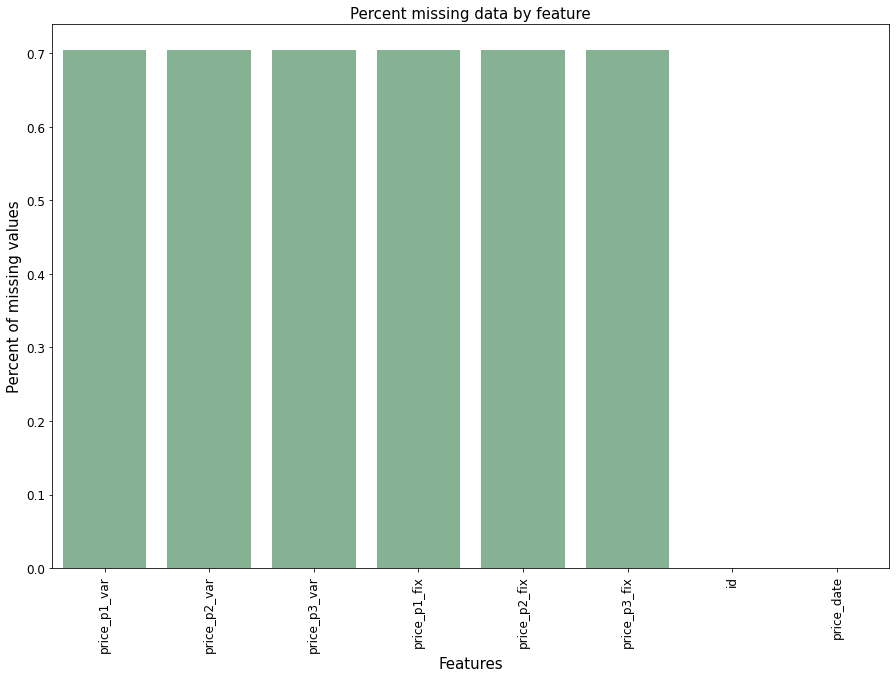

In [31]:
# PLOT OF MISSING VALUES % VS COLUMN_NAMES FROM H_P_D

missing_values_count = (H_P_D.isnull().sum()/H_P_D.isnull().count()*100).sort_values(ascending=False)
plt.figure(figsize=(15,10))
base_color = sns.color_palette("crest")[0]
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.xticks(rotation=90)
sns.barplot(missing_values_count[:10].index.values, missing_values_count[:10], color = base_color)

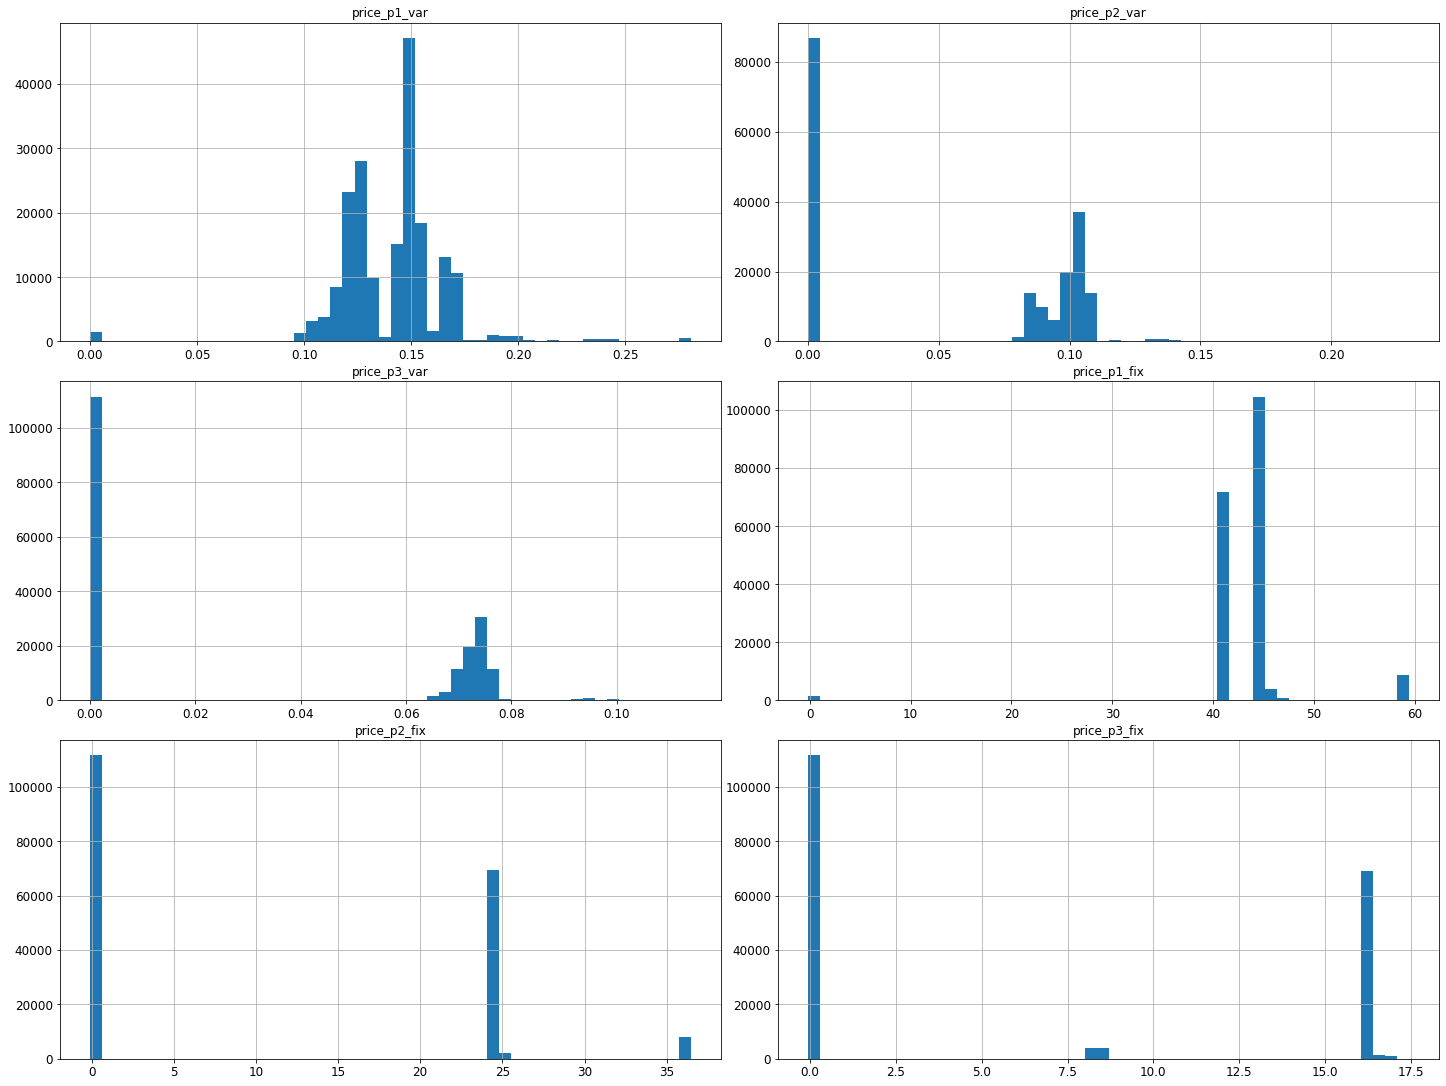

In [32]:
H_P_D_df.hist(bins=50, figsize=(20,15))
plt.tight_layout(pad=0.4)
plt.show()

<b>Check CH_I Dataset<b>

<AxesSubplot:xlabel='churn', ylabel='count'>

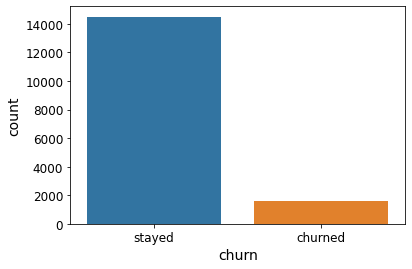

In [33]:
CH_I["churn"] = CH_I["churn"].replace({0:"stayed",1:"churned"})
CH_I["churn"].head()
sns.countplot(data=CH_I, x='churn', order=CH_I.churn.value_counts().index)

<b>      ≈ 10% of customers are likely to churn based on the output dataset in the first 3 months. <b>



<B>Dealing with Missing Values<B>

H_C_P and H_P_D datasets have many missing values. We will visualize and deal with the missing values whether we should remove or impute them with mean or median.

<b>H_P_D Datase<b>

In [34]:
# CHECK FOR NEGATIVE VALUES ON POWER PRICES

negative_prices_col = ["price_p1_fix","price_p2_fix","price_p3_fix"]
H_P_D_df[negative_prices_col].apply(abs)

H_P_D_df.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


We changed the negative values of price of energy into positive

<AxesSubplot:>

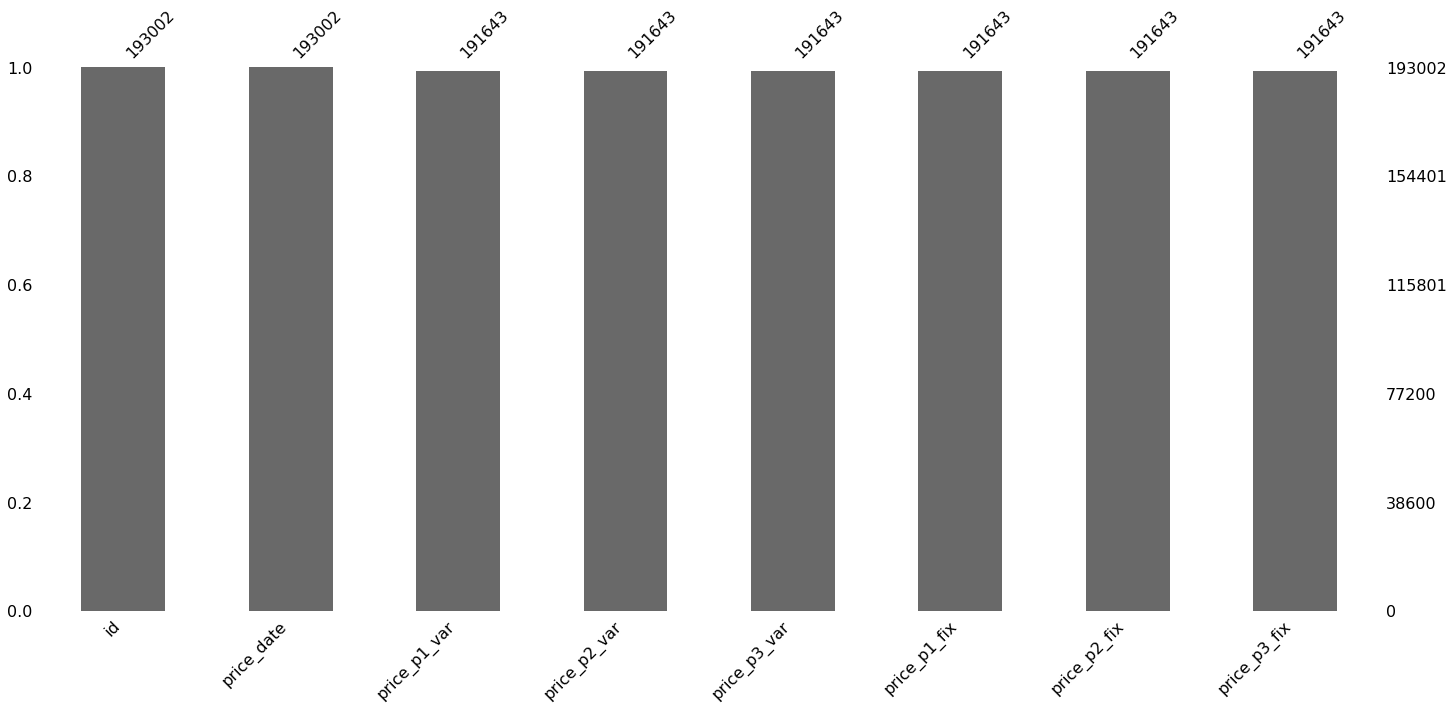

In [35]:
import missingno as msno
msno.bar(H_P_D_df)

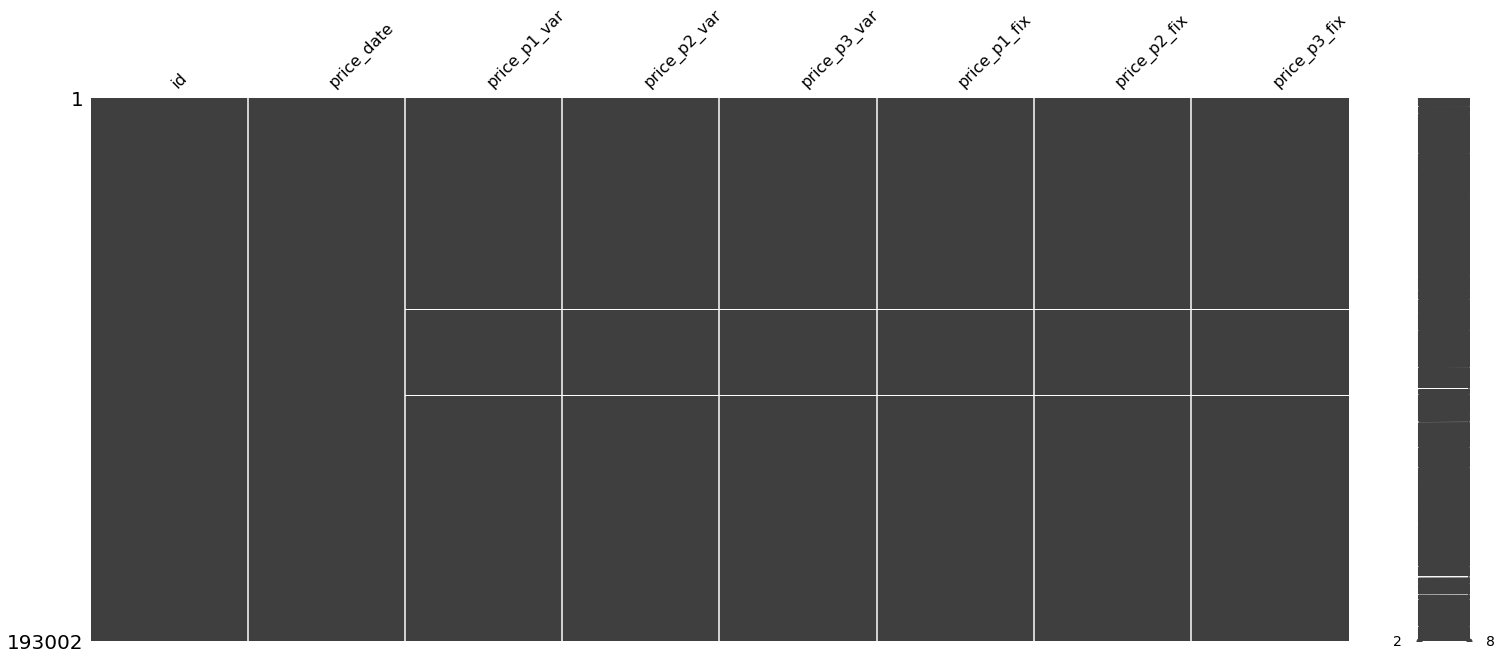

In [36]:
sorted = H_P_D_df.sort_values(by = ["id","price_date"])
msno.matrix(sorted)
gray_patch = mpatches.Patch(color='blue', label='Not Missing')
white_patch = mpatches.Patch(color='white', label='Missing')

After doing sorted by "id" and "price_date" we realized the <b>price columns<b> are mising.

<b>CORRELATION ON COLUMNS OF H_P_D DATASET IN HEATMAP<b>

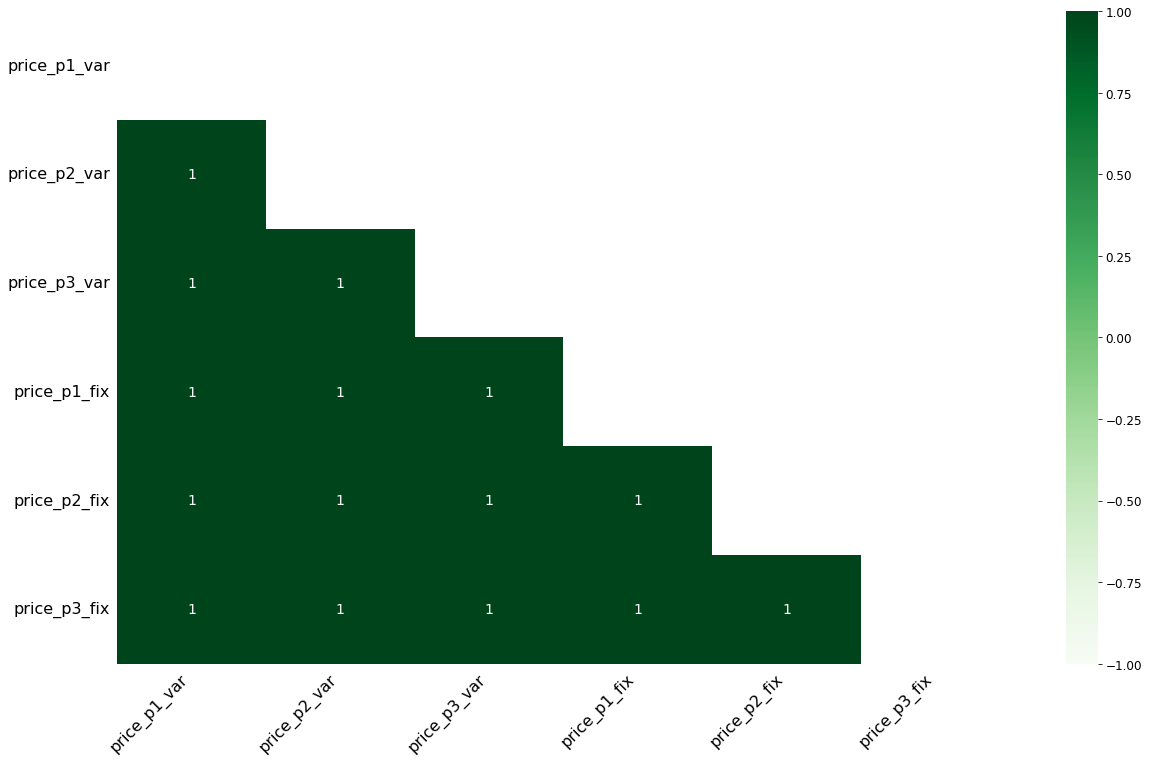

In [37]:
msno.heatmap(H_P_D_df,cmap="Greens")
plt.show()

In [38]:
# CHECK ID WITH MISSING VALUES ON THE OTHER COLUMNS
H_P_D_df_null =H_P_D_df[H_P_D_df.isnull().any(axis=1)].index.values.tolist()

In [39]:
# GET THE MISSING VALUES DATA
missing_values = H_P_D_df.iloc[H_P_D_df_null,:]
missing_values.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,ef716222bbd97a8bdfcbb831e3575560,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
221,0f5231100b2febab862f8dd8eaab3f43,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
377,2f93639de582fadfbe3e86ce1c8d8f35,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
413,f83c1ab1ca1d1802bb1df4d72820243c,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
461,3076c6d4a060e12a049d1700d9b09cf3,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# CHECK THE AMOUNT OF MISSING VALUES 
missing_values.shape

(1359, 8)

<b>There are 1359 missing values (not randomly) on the history dataset because there is a relationship between missing ones and their values, indicated from a hig multicollinearity among the columns on the heatmap as well<b>

In [41]:
## FOR PRICE COLUMNS (alldf)
alldf.fillna(method="bfill",inplace=True)

### Filling missing values (Imputation process)

In [42]:
## FOR PRICE COLUMNS (H_P_D_df)
H_P_D_df.fillna(method="bfill",inplace=True)
H_P_D_df.iloc[H_P_D_df_null,3:9].head()

,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,0.000000,0.000000,44.266930,0.00000,0.000000
221,0.000000,0.000000,44.444710,0.00000,0.000000
377,0.088643,0.000000,44.444710,0.00000,0.000000
413,0.102802,0.072713,40.728885,24.43733,16.291555
461,0.000000,0.000000,44.444710,0.00000,0.000000


In [43]:
H_P_D_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_p1_var,193002.0,0.141004,0.025107,0.000000,0.125976,0.146033,0.151635,0.280700
price_p2_var,193002.0,0.054390,0.050040,0.000000,0.000000,0.085450,0.101780,0.229788
price_p3_var,193002.0,0.030698,0.036335,0.000000,0.000000,0.000000,0.072558,0.114102
price_p1_fix,193002.0,43.326161,5.434603,-0.177779,40.728885,44.266930,44.444710,59.444710
price_p2_fix,193002.0,10.692753,12.854720,-0.097752,0.000000,0.000000,24.339581,36.490692
price_p3_fix,193002.0,6.452467,7.781830,-0.065172,0.000000,0.000000,16.226389,17.458221


### Merging dataframes (H_P_D with CH_I) on "id" column

In [44]:
H_P_D_CH_I_df = H_P_D_df.merge(CH_I,on=["id"])
H_P_D_CH_I_df.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,stayed
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,stayed
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,stayed
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,stayed
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,stayed


### Checking Missingness on H_C_D data

<AxesSubplot:>

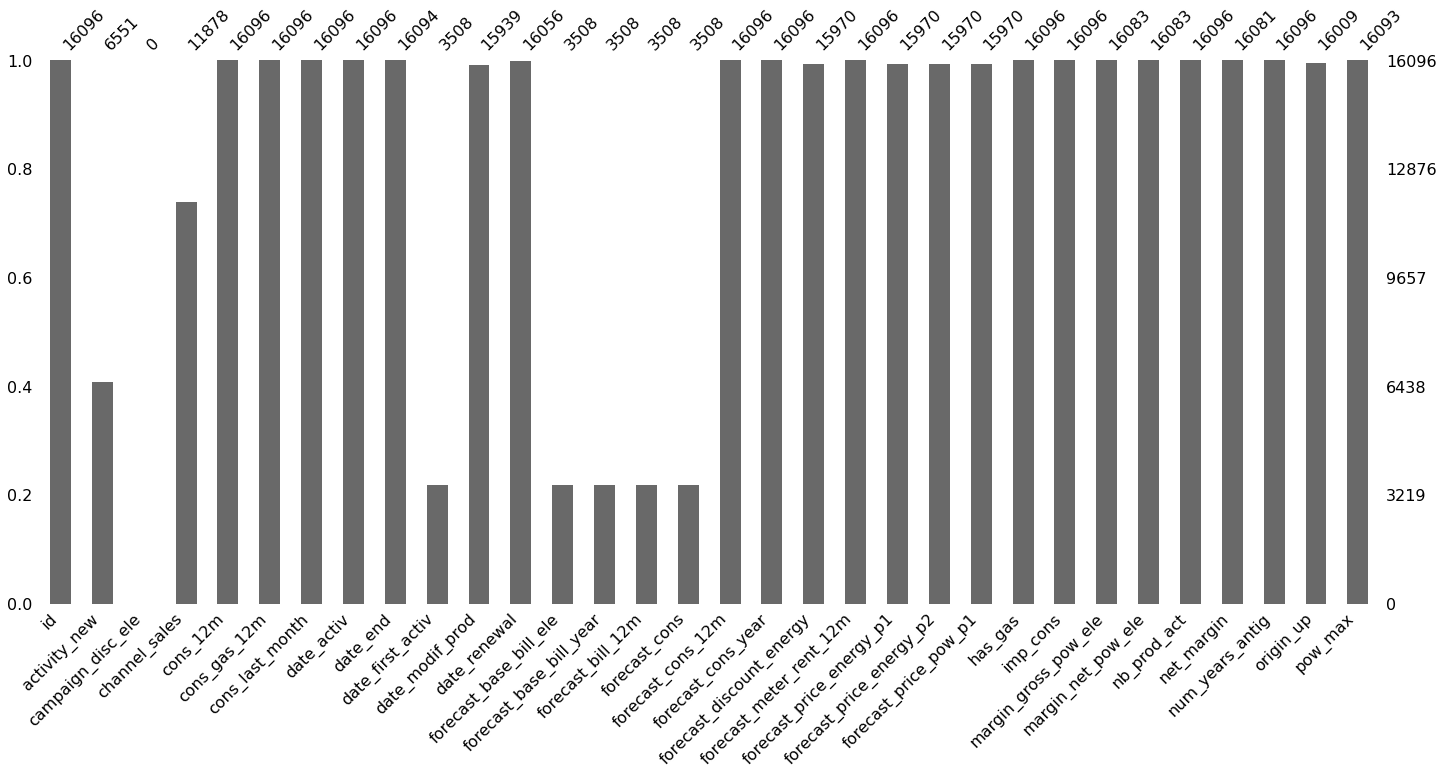

In [45]:
msno.bar(H_C_D_df)

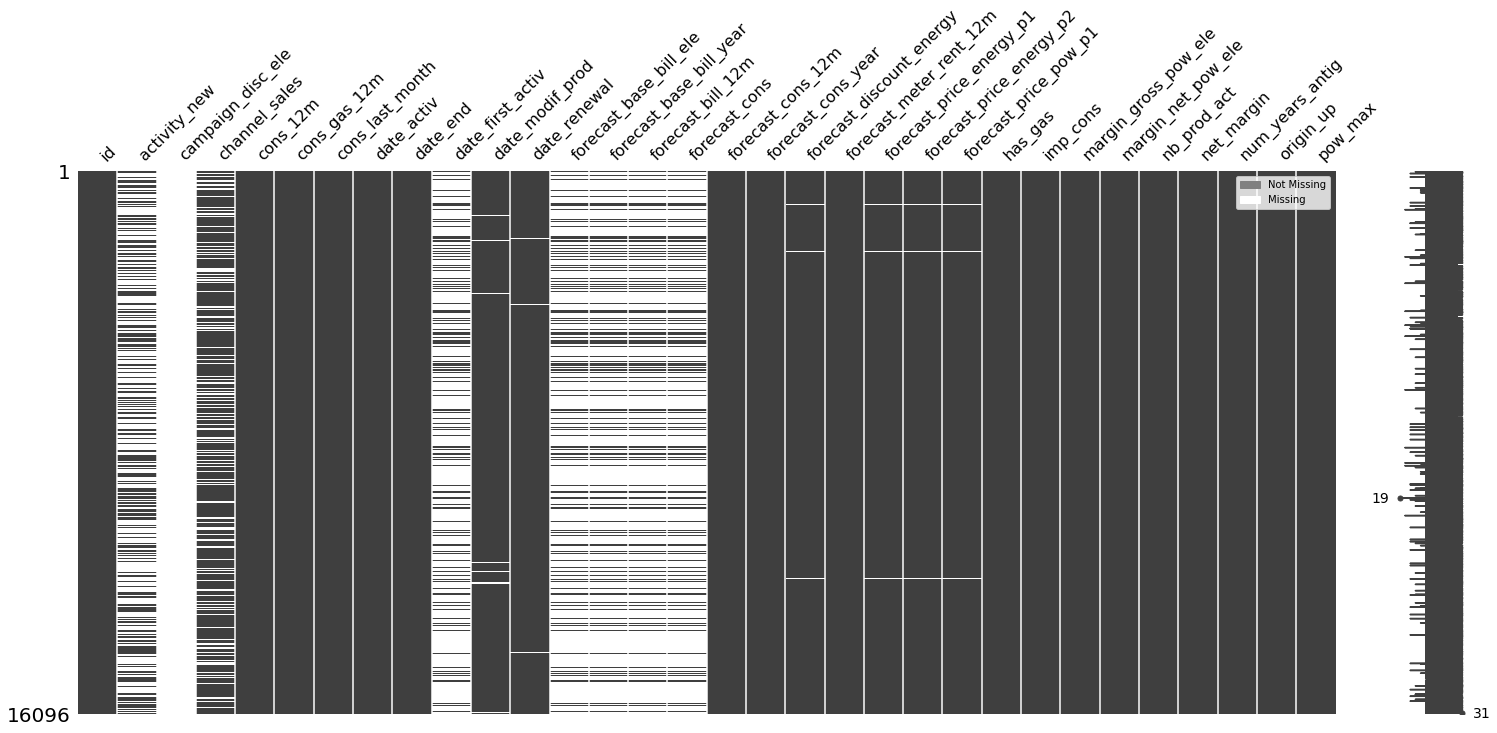

In [46]:
msno.matrix(H_C_D_df)
gray_patch = mpatches.Patch(color='gray', label='Not Missing')
white_patch = mpatches.Patch(color='white', label='Missing')
plt.legend(handles=[gray_patch, white_patch])
plt.show()

<AxesSubplot:>

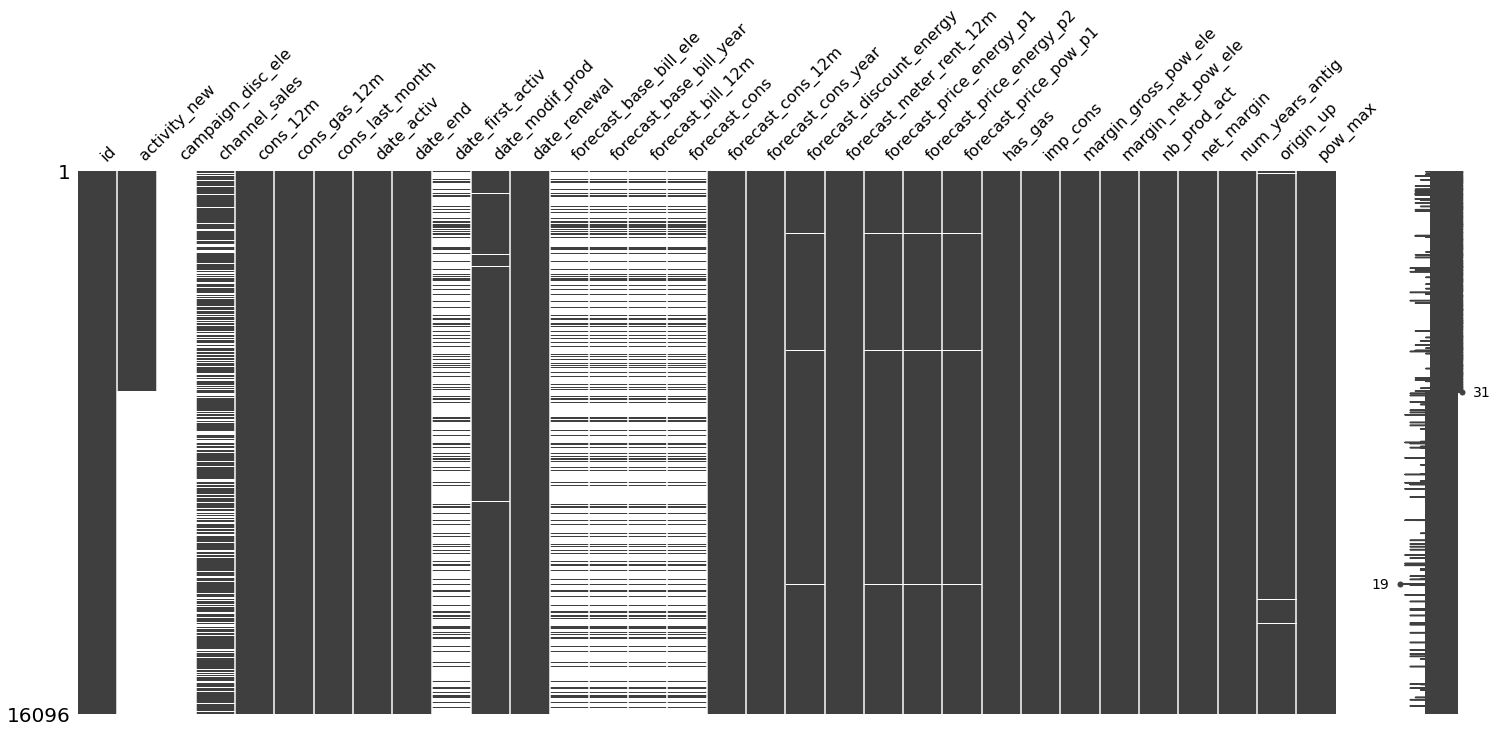

In [47]:
sorted_main = H_C_D_df.sort_values('activity_new')
msno.matrix(sorted_main)

<b>Check correlation among missing values<b>

<AxesSubplot:>

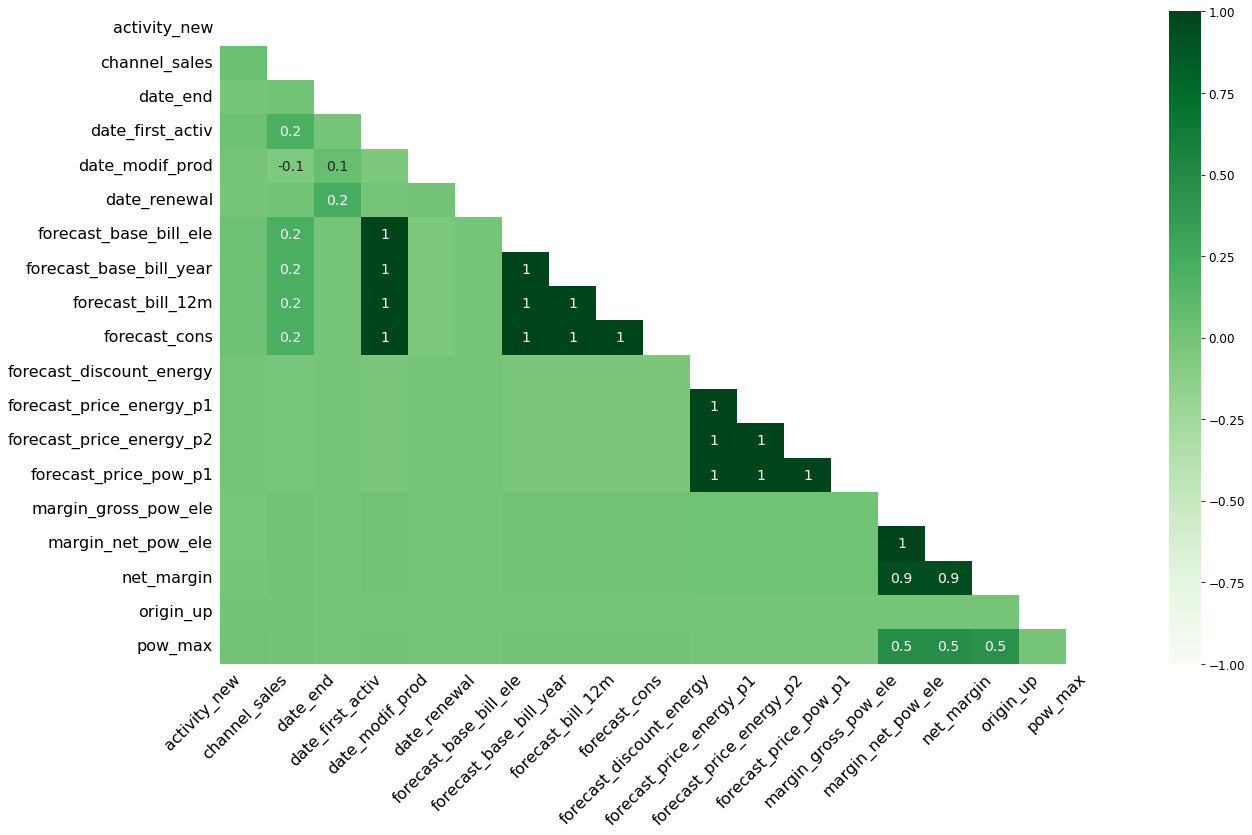

In [48]:
 msno.heatmap(H_C_D_df,cmap="Greens")

<b>The dendrogram bellow shows the deeper understanding about correlation of each features based on the top-down approach like "net_margin" and "margin_net_pole_ele" that have higher similarity because of closer distance<b>

<AxesSubplot:>

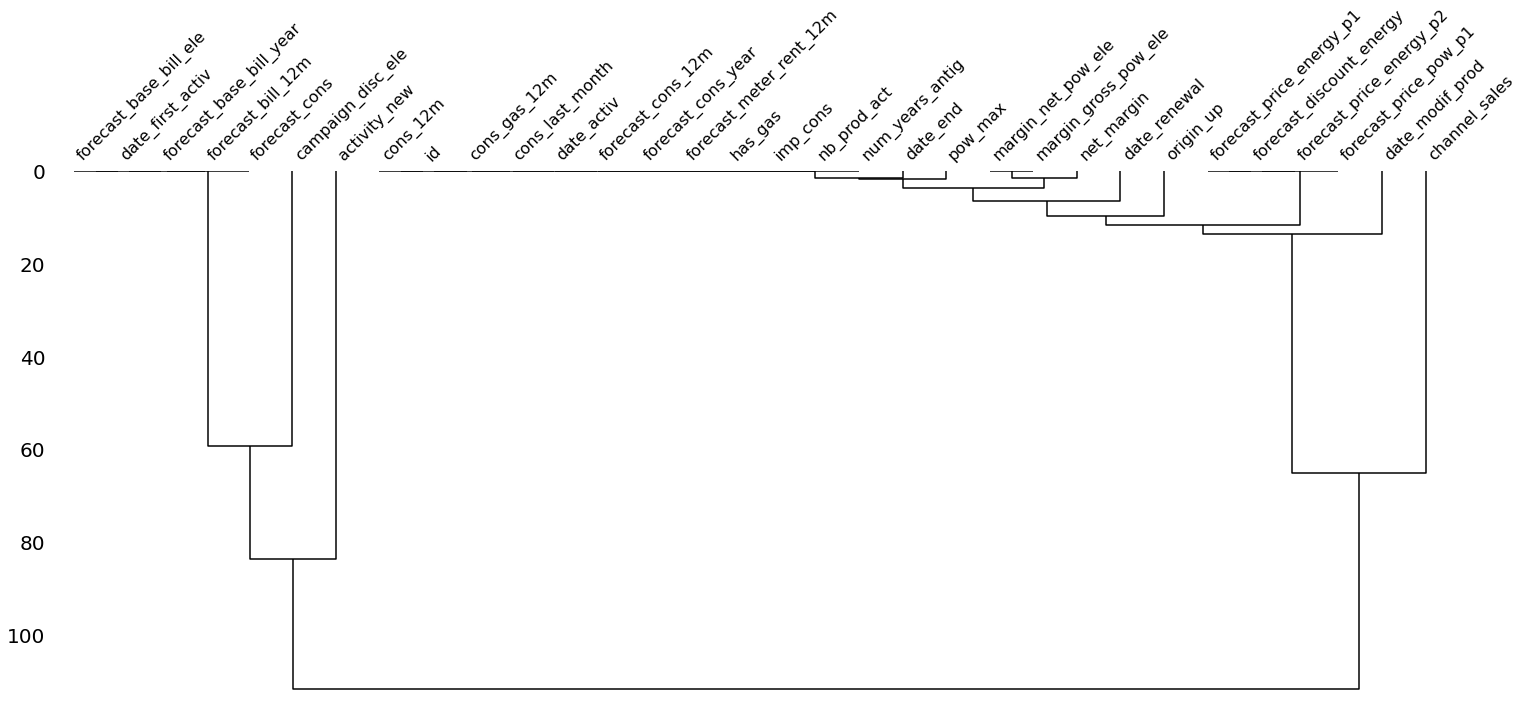

In [49]:
msno.dendrogram(H_C_D_df)

In [50]:
# Checking the correlation between "date_activ" and "date_first_activ", either could potentially change the values
date_active_first_compare = ["date_activ","date_first_activ"]
date_compare = H_C_D_df[date_active_first_compare]
date_compare.isnull().sum()

date_activ              0
date_first_activ    12588
dtype: int64

we can see there are different ways of comparing the dates between these two variables like for the date in february compared to july, It will make the data bias.

In [51]:
def compare_date(df,column):
    date_compare = df[column]
    date_compare_cc =date_compare.dropna(subset=[column[1]],how="any",inplace=False)
    date_compare_cc[column[0]].equals(date_compare_cc[column[1]])
    date_compare_desc = date_compare_cc.describe()
    return date_compare_desc

columns = ['date_activ','date_first_activ']
compare_date(H_C_D_df,columns)

,date_activ,date_first_activ
count,3508,3508
unique,1097,1133
top,2012-02-01,2009-07-14
freq,31,34


### Dropping columns

In [52]:
H_C_D_df_drop_columns = H_C_D_df.drop(labels=["activity_new","campaign_disc_ele"],axis=1)

In [53]:
dropna_columns = ['date_end','date_modif_prod','date_renewal','origin_up','pow_max','margin_gross_pow_ele',
                  'margin_net_pow_ele', 'net_margin','forecast_discount_energy','forecast_price_energy_p1',
         'forecast_price_energy_p2','forecast_price_pow_p1' , "activity_new","campaign_disc_ele",
                 'price_date', 'price_p1_var', 'price_p2_var', 'price_p3_var',
       'price_p1_fix', 'price_p2_fix', 'price_p3_fix', "id"]
alldf.drop(columns=dropna_columns,axis=1,inplace=True)

In [54]:
alldf.columns

Index(['index', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_first_activ', 'forecast_base_bill_ele',
       'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_meter_rent_12m',
       'has_gas', 'imp_cons', 'nb_prod_act', 'num_years_antig', 'churn'],
      dtype='object')

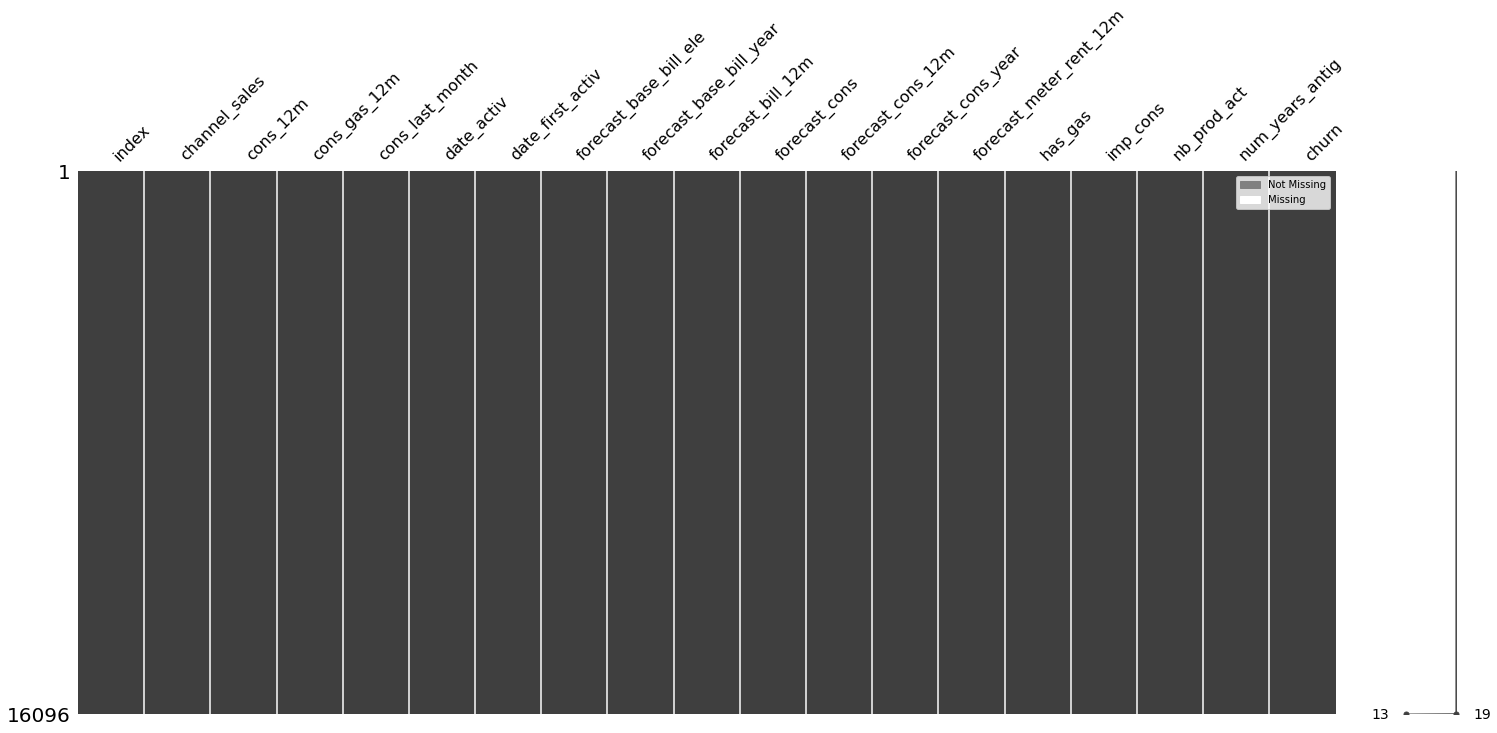

In [55]:
msno.matrix(alldf)
gray_patch = mpatches.Patch(color='gray', label='Not Missing')
white_patch = mpatches.Patch(color='white', label='Missing')
plt.legend(handles=[gray_patch, white_patch])
plt.show()

<AxesSubplot:>

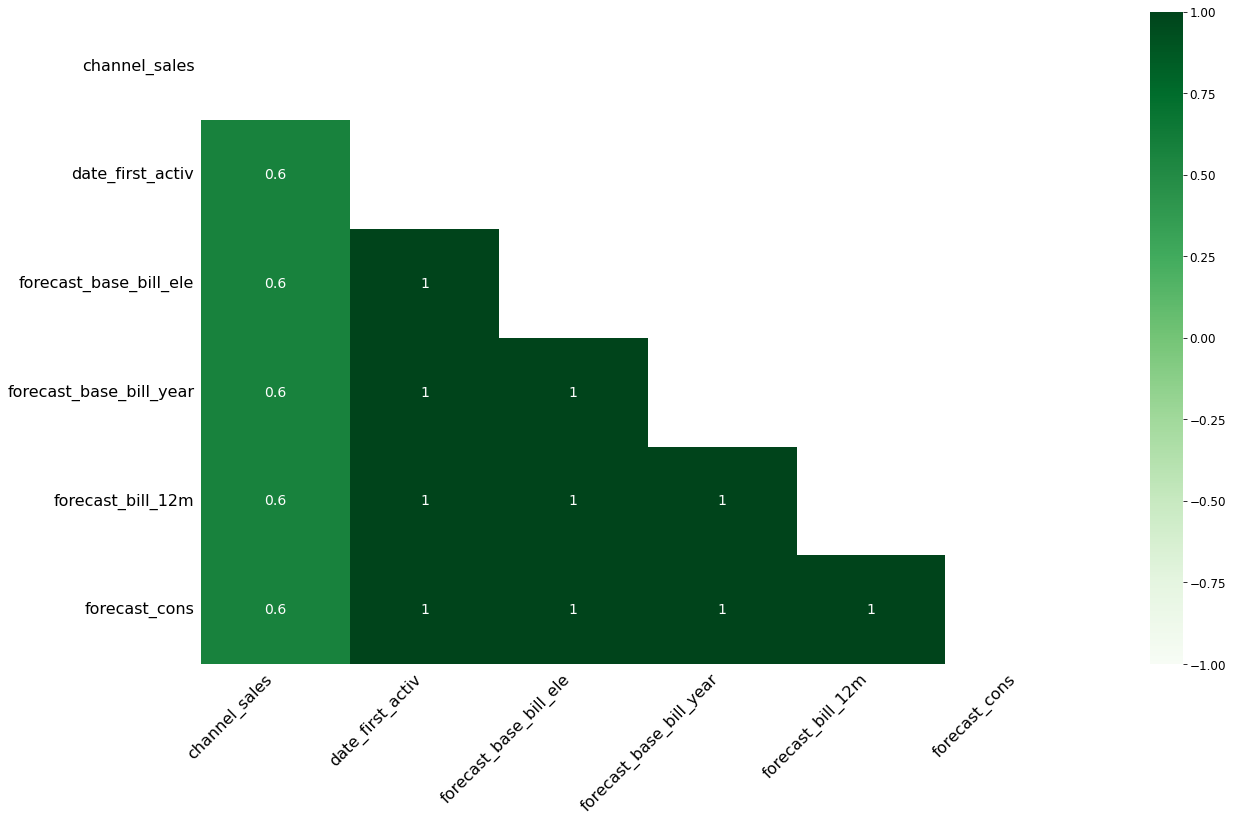

In [56]:
# Check correlation
msno.heatmap(alldf,cmap="Greens")

<b>Based on the graph above, we can conclude a few notes related missing values as follows:</b>


<b>(MCAR)</b> Missing completely at random. When data are MCAR, the fact that the data are missing is independent of the observed and unobserved data.
<b>(MAR)</b>  Missing at random occurs when the missingness is not random, but where missingness can be fully accounted for by variables where there is complete information.    
<b>(MNAR)</b> Missing not at random (also known as nonignorable nonresponse) is data that is neither MAR nor MCAR (ie the value of the variable that's missing is related to the reason it's missing).  

- "activity_new" is <b>(MCAR)</b> and has low correlation with any of the variables. we can <b>drop</b> this feature
- "channel_sales" is <b>(MAR)</b>  and has correlation with a few variables.
- "campaign_disc_elec" is <b>(MCAR)</b> on all the instances. This depicts that subscribers do not subscribe by campaign offers.
- "date_first_active" is <b>(MAR)</b>  because it could not be replaced by date_activ
- "margin_net_pole_ele" has a strong correlation with margin_gross_pole_ele. it indicates multicollinearity. so does "net_margin" and "margin_gross_pow_ele".
- "pow_up" and "pow_max" are <b>(MCAR)</b> that indicates no correlation and depicts a few mising values. we can drop these variables.
- "forecast_base_bill_ele", "forecast_base_bill_year", "forecast_bill_12m" and "forecast_cons" have high correlation with "date_first_active"(score 1 in the heatmap).Due to the dates are not identical and it could not be replaced by date_activ, then it is <b>(MNAR)</b> (possibility of systematic missing values).

In [57]:
uncomplete_columns = ['channel_sales','date_first_activ','forecast_base_bill_ele','forecast_base_bill_year','forecast_bill_12m','forecast_cons']
alldf.dropna(subset=uncomplete_columns,how="any",inplace=True)

### Fixing negative values

In [58]:
alldf

,index,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_first_activ,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_meter_rent_12m,has_gas,imp_cons,nb_prod_act,num_years_antig,churn
0,0,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2010-04-08,1399.83,1399.83,14559.74,1052.37,26520.30,10025,359.29,f,831.80,1,3,0
1,1,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2010-04-08,1399.83,1399.83,14559.74,1052.37,0.00,0,1.78,t,0.00,2,3,1
2,2,foosdfpfkusacimwkcsosbicdxkicaua,4660,0,0,2009-08-21,2010-04-08,1399.83,1399.83,14559.74,1052.37,189.95,0,16.27,f,0.00,1,6,0
3,3,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2010-04-08,1399.83,1399.83,14559.74,1052.37,47.96,0,38.72,f,0.00,1,6,0
4,4,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2010-04-08,1399.83,1399.83,14559.74,1052.37,240.04,0,19.83,f,0.00,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16088,16088,foosdfpfkusacimwkcsosbicdxkicaua,9441,0,480,2009-10-08,2013-02-08,255.15,255.15,2550.54,71.81,983.97,480,132.11,f,46.98,1,6,0
16089,16089,foosdfpfkusacimwkcsosbicdxkicaua,18163,3036,0,2010-01-26,2013-02-08,255.15,255.15,2550.54,71.81,2663.82,0,16.35,t,0.00,3,6,0
16090,16090,foosdfpfkusacimwkcsosbicdxkicaua,87146,0,11367,2013-02-08,2013-02-08,255.15,255.15,2550.54,71.81,712.33,713,145.82,f,71.81,1,3,0
16091,16091,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2012-08-27,68.64,68.64,1254.65,15.94,4648.01,0,18.57,t,0.00,2,4,0


In [59]:
alldf.describe()

,index,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_meter_rent_12m,imp_cons,nb_prod_act,num_years_antig,churn
count,16093.000000,1.609300e+04,1.609300e+04,1.609300e+04,16093.000000,16093.000000,16093.000000,16093.000000,16093.000000,16093.000000,16093.000000,16093.000000,16093.000000,16093.000000,16093.000000
mean,8046.000000,1.948400e+05,3.191759e+04,1.946515e+04,328.599036,328.599036,3810.278795,200.978418,2370.937452,1907.691667,70.314486,196.158886,1.347853,5.030759,0.099049
std,4645.793276,6.795734e+05,1.776045e+05,8.236401e+04,601.260824,601.260824,5309.481521,413.864373,4035.362680,5257.794135,79.025783,494.406230,1.459936,1.676143,0.298737
min,0.000000,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,-242.960000,-9038.210000,1.000000,1.000000,0.000000
25%,4023.000000,5.908000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1143.510000,0.000000,513.310000,0.000000,16.230000,0.000000,1.000000,4.000000,0.000000
50%,8046.000000,1.533600e+04,0.000000e+00,9.010000e+02,159.930000,159.930000,2181.890000,35.610000,1179.570000,379.000000,19.440000,44.550000,1.000000,5.000000,0.000000
75%,12069.000000,5.022600e+04,0.000000e+00,4.127000e+03,397.310000,397.310000,4240.140000,228.220000,2692.160000,1995.000000,131.470000,218.150000,1.000000,6.000000,0.000000
max,16092.000000,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,2411.690000,15042.790000,32.000000,16.000000,1.000000


### Converting "has_gas" column values

In [60]:
alldf.has_gas

0        f
1        t
2        f
3        f
4        f
        ..
16088    f
16089    t
16090    f
16091    t
16092    f
Name: has_gas, Length: 16093, dtype: object

In [61]:
def change_columns_type(df,col):
    if col == "has_gas":
        df[col] = df[col].replace({"f":"Yes","t":"No"})
    df[col].replace({1:"Churned",0:"Stayed"})

In [62]:
change_columns_type(alldf,"has_gas")

In [63]:
alldf.head()

,index,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_first_activ,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_meter_rent_12m,has_gas,imp_cons,nb_prod_act,num_years_antig,churn
0,0,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2010-04-08,1399.83,1399.83,14559.74,1052.37,26520.30,10025,359.29,Yes,831.8,1,3,0
1,1,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2010-04-08,1399.83,1399.83,14559.74,1052.37,0.00,0,1.78,No,0.0,2,3,1
2,2,foosdfpfkusacimwkcsosbicdxkicaua,4660,0,0,2009-08-21,2010-04-08,1399.83,1399.83,14559.74,1052.37,189.95,0,16.27,Yes,0.0,1,6,0
3,3,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2010-04-08,1399.83,1399.83,14559.74,1052.37,47.96,0,38.72,Yes,0.0,1,6,0
4,4,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2010-04-08,1399.83,1399.83,14559.74,1052.37,240.04,0,19.83,Yes,0.0,1,6,0


### Convert date (object) format into datetime (datetime64[ns])

In [64]:
alldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16093 entries, 0 to 16092
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    16093 non-null  int64  
 1   channel_sales            16093 non-null  object 
 2   cons_12m                 16093 non-null  int64  
 3   cons_gas_12m             16093 non-null  int64  
 4   cons_last_month          16093 non-null  int64  
 5   date_activ               16093 non-null  object 
 6   date_first_activ         16093 non-null  object 
 7   forecast_base_bill_ele   16093 non-null  float64
 8   forecast_base_bill_year  16093 non-null  float64
 9   forecast_bill_12m        16093 non-null  float64
 10  forecast_cons            16093 non-null  float64
 11  forecast_cons_12m        16093 non-null  float64
 12  forecast_cons_year       16093 non-null  int64  
 13  forecast_meter_rent_12m  16093 non-null  float64
 14  has_gas               

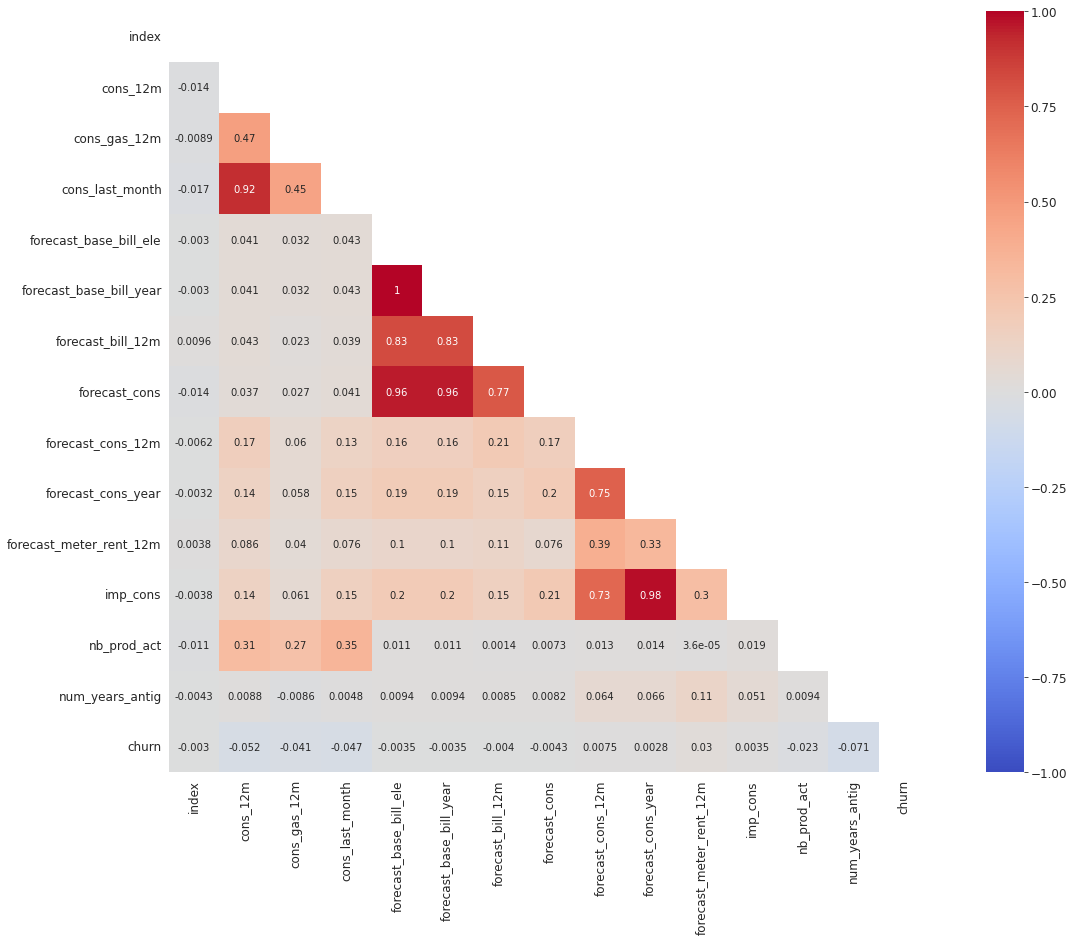

In [65]:
corr =alldf.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 14))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

Data seems to be veeery clean, on the heatmap the correlation among variables is small and it can avoid multicollinearity for building our machine learning model.

## Calculate Zscore of tenure

In [66]:
tenure_zscores =zscore(alldf["num_years_antig"])
tenure_zscores

0       -1.211604
1       -1.211604
2        0.578275
3        0.578275
4        0.578275
           ...   
16088    0.578275
16089    0.578275
16090   -1.211604
16091   -0.614978
16092   -1.211604
Name: num_years_antig, Length: 16093, dtype: float64

<AxesSubplot:>

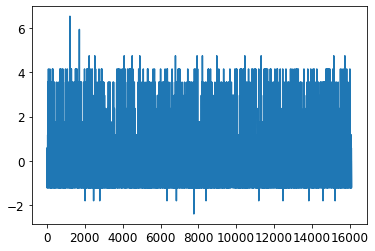

In [67]:
tenure_zscores.plot()

### Change the negative values of tenure Zscores

In [68]:
abs_tenure_zscores = np.abs(tenure_zscores)

<AxesSubplot:>

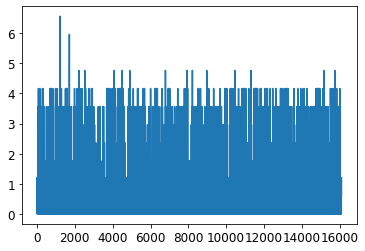

In [69]:
abs_tenure_zscores.plot()

Most of the Zscores values ranges from 1 to 3

### We will compare Churn vs Tenure

In [70]:
churn_tenure = alldf[["churn","num_years_antig"]]
churn_tenure["zscore"] = abs_tenure_zscores.tolist()
churn_tenure.head()

,churn,num_years_antig,zscore
0,0,3,1.211604
1,1,3,1.211604
2,0,6,0.578275
3,0,6,0.578275
4,0,6,0.578275


### Remove outliers if zscores above 3

In [71]:
churn_tenure_filtered = churn_tenure[churn_tenure['zscore'] < 3]

In [72]:
churn_tenure_filtered

,churn,num_years_antig,zscore
0,0,3,1.211604
1,1,3,1.211604
2,0,6,0.578275
3,0,6,0.578275
4,0,6,0.578275
...,...,...,...
16088,0,6,0.578275
16089,0,6,0.578275
16090,0,3,1.211604
16091,0,4,0.614978


### Finding more numeric features

In [73]:
numeric_dtypes = ['int64', 'float64']
numeric = []
for i in alldf.columns:
    if alldf[i].dtype in numeric_dtypes:
        if i in ['forecast_cons_12m',"forecast_discount_energy","cons_12m","cons_gas_12m","cons_last_month","forecast_cons_year","nb_prod_act","pow_max"]:
            pass
        else:
            numeric.append(i)

### We will use boxplot to visualize some more outliers in the data values

## Additional conclutions

<b>Base on the boxplot graph:<b/>
- The median years as customers who are likely to churn is 4 years
- The median years as customers who are likely to stay is 5 years
- Customers are more likely to churn in the 4th year than the 7th
- The graphic show the other features are correlater to each other and Churn

### We will find now the most popular electricity campaign
Code of electricity campaign <b>lxidpiddsbxsbosboudacockeimpuepw</b> is the most popular origin up with 47% currrent customers

### We will find now the highest netting electricity subscription campaign
We can see the correlation between popular electricity with the net margin earned in 2015.

### We will fing the best 5 customers by tenure and net margin

## Feature Engineering
Building some new features from the exisitng features that might help the model, starting with contract's tenure.

In [74]:
alldf.columns

Index(['index', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_first_activ', 'forecast_base_bill_ele',
       'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_meter_rent_12m',
       'has_gas', 'imp_cons', 'nb_prod_act', 'num_years_antig', 'churn'],
      dtype='object')

In [75]:
alldf.loc[:,"churn"]

0        0
1        1
2        0
3        0
4        0
        ..
16088    0
16089    0
16090    0
16091    0
16092    1
Name: churn, Length: 16093, dtype: int64

In [76]:
alldf = alldf.drop_duplicates(keep='first')

In [77]:
alldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16093 entries, 0 to 16092
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    16093 non-null  int64  
 1   channel_sales            16093 non-null  object 
 2   cons_12m                 16093 non-null  int64  
 3   cons_gas_12m             16093 non-null  int64  
 4   cons_last_month          16093 non-null  int64  
 5   date_activ               16093 non-null  object 
 6   date_first_activ         16093 non-null  object 
 7   forecast_base_bill_ele   16093 non-null  float64
 8   forecast_base_bill_year  16093 non-null  float64
 9   forecast_bill_12m        16093 non-null  float64
 10  forecast_cons            16093 non-null  float64
 11  forecast_cons_12m        16093 non-null  float64
 12  forecast_cons_year       16093 non-null  int64  
 13  forecast_meter_rent_12m  16093 non-null  float64
 14  has_gas               

# Modeling & Evaluation¶

Split the data into Independent and Dependent variables. 


In [78]:
alldf.drop(['channel_sales', 'date_first_activ'], axis=1, inplace=True)

In [79]:
alldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16093 entries, 0 to 16092
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    16093 non-null  int64  
 1   cons_12m                 16093 non-null  int64  
 2   cons_gas_12m             16093 non-null  int64  
 3   cons_last_month          16093 non-null  int64  
 4   date_activ               16093 non-null  object 
 5   forecast_base_bill_ele   16093 non-null  float64
 6   forecast_base_bill_year  16093 non-null  float64
 7   forecast_bill_12m        16093 non-null  float64
 8   forecast_cons            16093 non-null  float64
 9   forecast_cons_12m        16093 non-null  float64
 10  forecast_cons_year       16093 non-null  int64  
 11  forecast_meter_rent_12m  16093 non-null  float64
 12  has_gas                  16093 non-null  object 
 13  imp_cons                 16093 non-null  float64
 14  nb_prod_act           

In [80]:
X=alldf.drop(["has_gas", "churn", "date_activ"], axis=1)
y=alldf['churn']

## Upsampling using SMOTE

In [81]:
y.value_counts()

0    14499
1     1594
Name: churn, dtype: int64

In [82]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    14499
1    14499
Name: churn, dtype: int64

## Splitting the data

Next we will split the data into training and validation data (75%-25%)
We also use a random state generator in order to split it randomly.

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
y_train

12976    0
7224     0
5890     0
2117     0
5595     0
        ..
13418    0
5390     0
860      0
15795    0
7270     0
Name: churn, Length: 12874, dtype: int64

,Error_metric,Train,Test
0,Accuracy,0.900497,0.909599
1,Precision,0.941176,1.000000
2,Recall,0.012346,0.023490


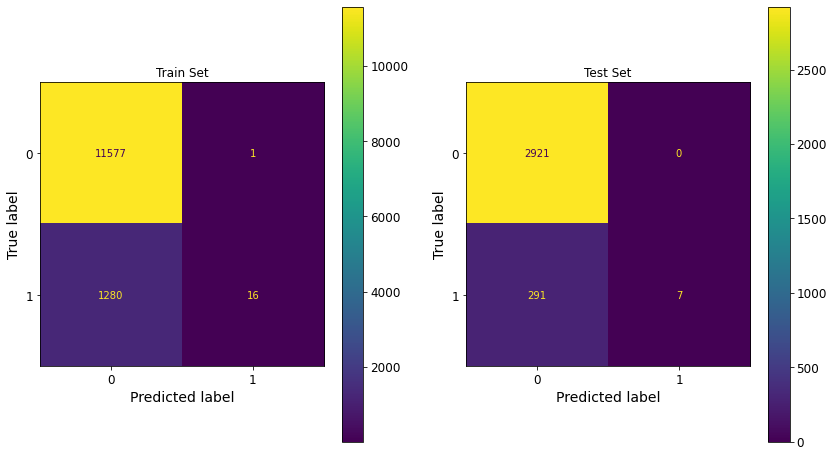

In [87]:
model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label= 1),
                                         recall_score(y_train, y_pred_train_dt, pos_label= 1)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label= 1),
                                        recall_score(y_test, y_pred_test_dt, pos_label= 1)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))
plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

0.9009635895505459


,Error_metric,Train,Test
0,Accuracy,1.0,0.908357
1,Precision,1.0,0.666667
2,Recall,1.0,0.020134


Confusion matrix for the train set
[[11578     0]
 [    0  1296]]


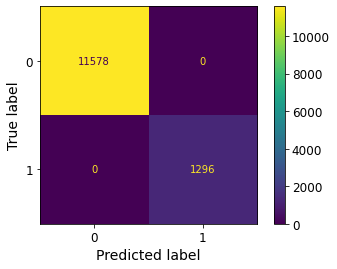



Confusion matrix for the test set
[[2918    3]
 [ 292    6]]


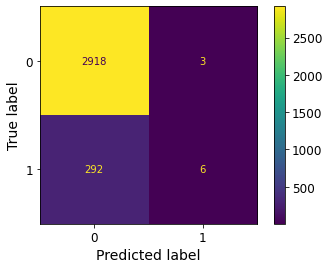

In [88]:
forest_model= RandomForestClassifier(random_state=0, max_features='sqrt', 
                             min_samples_leaf=1, min_samples_split=2, n_estimators=100)
cross_val_scores = cross_val_score(forest_model, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

forest_model.fit(X_train, y_train)

y_pred_train_log = forest_model.predict(X_train)
y_pred_test_log = forest_model.predict(X_test)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log, pos_label= 1),
                                         recall_score(y_train, y_pred_train_log, pos_label= 1)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log, pos_label= 1),
                                        recall_score(y_test, y_pred_test_log, pos_label= 1)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(forest_model,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(forest_model,X_test,y_test, values_format = 'd')
plt.show()

# This may not the best way to view each estimator as it is small
fn=data.feature_names
cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

,Error_metric,Train,Test
0,Accuracy,0.899177,0.907114
1,Precision,0.000000,0.000000
2,Recall,0.000000,0.000000


Confusion matrix for the train set
[[11576     2]
 [ 1296     0]]


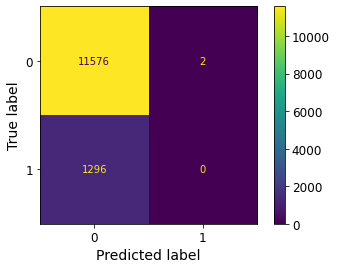



Confusion matrix for the test set
[[2920    1]
 [ 298    0]]


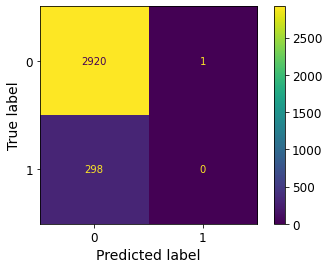

In [90]:
log_model = LogisticRegression() 

log_model.fit(X_train, y_train)

y_pred_train_log = log_model.predict(X_train)
y_pred_test_log = log_model.predict(X_test)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log, pos_label=1),
                                         recall_score(y_train, y_pred_train_log, pos_label= 1)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log, pos_label=1),
                                        recall_score(y_test, y_pred_test_log, pos_label=1)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test,y_test, values_format = 'd')
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 500],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf' : [1, 2, 3, 4],
    "n_jobs" : [-1],
    "random_state" : [42, 69]
    #'max_features': ['sqrt']
    ##'max_samples' : ['None', 0.5],
    ##'max_depth':[3,5,10],
    ## 'bootstrap':[True,False]
    }
clf_RFC_GsCV = RandomForestClassifier(param_grid, oob_score = True)
grid_search = GridSearchCV(clf_RFC_GsCV, param_grid, cv = 10, return_train_score = True).fit(X_train,y_train)
grid_search.best_params_

In [ ]:
sns.regplot(x=x, y=y, data=log_model, logistic=True, ci=None)

We are going to evaluate our model on our test data (which we did not use for training) using the evalution metrics of:

In [ ]:
def evaluate(model_, X_test_, y_test_):
 
    prediction_test_ = model_.predict(X_test_)

    results = pd.DataFrame({"Accuracy" : [metrics.accuracy_score(y_test_, prediction_test_)],
    "Precision" : [metrics.precision_score(y_test_, prediction_test_, pos_label="churned")],
    "Recall" : [metrics.recall_score(y_test_, prediction_test_, pos_label="churned")]})
    
    return results

In [ ]:
evaluate(forest_model, X_test, y_test)

In [ ]:
clf = RandomForestClassifier(random_state=0, max_features='sqrt', 
                             min_samples_leaf=1, min_samples_split=2, n_estimators=100)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))